<a href="https://colab.research.google.com/github/ozgekadioglu/Deposit_Next_NN/blob/main/presentable_note_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import random as python_random

pd.options.display.max_rows = 200 #sets the max rows head() shows.

SEED = 42
import os
import random as rn
import numpy as np
import tensorflow
def reset_seeds():
  os.environ['PYTHONHASHSEED']=str(SEED)
  np.random.seed(SEED)
  tensorflow.random.set_seed(SEED)
  rn.seed(SEED)

# Import Data

In [15]:
data = pd.read_csv('data.csv')

# Data Exploration

,tenure,deposit,turnover,withdrawal,deposit_next
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000
mean,1864.481550,1.369928e+04,9.769238e+04,1.006292e+04,508.521096
std,1981.166128,6.977305e+04,6.342309e+05,5.414502e+04,1999.365001
min,0.000000,2.175000e+01,0.000000e+00,0.000000e+00,0.000000
25%,197.000000,1.376875e+02,4.154825e+02,0.000000e+00,0.000000
50%,1254.000000,8.297000e+02,3.382435e+03,3.289600e+02,0.000000
75%,2970.000000,4.825380e+03,2.602971e+04,3.507213e+03,214.595000
max,7969.000000,2.851920e+06,3.815992e+07,3.328575e+06,94871.490000


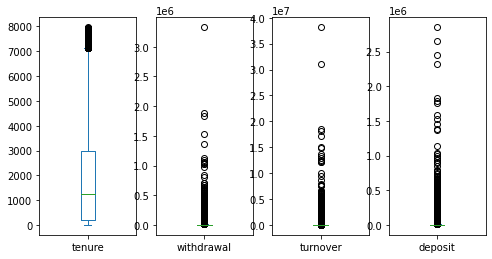

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=[8, 4])
data.tenure.plot.box(ax=axes[0])
data.withdrawal.plot.box(ax=axes[1])
data.turnover.plot.box(ax=axes[2])
data.deposit.plot.box(ax=axes[3])

data.describe()

There are lots of outliers for each input feature. After creating a benchmarking model, I will train a model for the datapoints where the outliers of tenure are removed. (outlier=3*std)

# Benchmark Model

First model will be trained by using all the datapoints available in the dataset.

*   4-layer NN was build by using fully connected layers. 
*   3 dense hidden layers with 128-64-32 neurons
*   20,000 datapoints
*   33% of the datapoints is kept as validation set.
*   Input layer consists of 4 neurons: 'tenure', 'deposit', 'turnover', 'withdrawal'
*   Activation functions were used to the layers: 'relu'
*   Adam algorithm was used to update the NN weights.
*   Mean Absolute Error (MAE) was chosen to be the loss function. Thus, during the training MAE is aimed to minimize.

During the entire training, data will pass through the network many times. Each time it passes (1 epoch) the respective weight is updated. After each epoch we expect the loss function to decrease since the model will improve as the weights will be updated during the back-propagation.

In regression problems, there are several evaluation metrics. For the current problem and the dataset, I chose to use mean absolute error because I didn't want large errors to create large biases on the evaluation. When calculating MAE, individual differences between the predicted and expected values have equal weight while in RMSE larger differences are penalized. Looking at the boxplots in the previous cell, it is seen that there are lots of outliers in our dataset. Thus, it will be more intutive to use a metric that is robust to outliers, like MAE.

A very long epochs used in order to see the point after which the validation loss fluctuates with minor differences and become almost stable. The reason for this is that we aim to minimize the validation loss and achieve this in an optimal way by lowering the computational resources.

In [11]:
reset_seeds()

target = data.deposit_next
input_features = data[['tenure', 'deposit', 'turnover', 'withdrawal']]

scaler = StandardScaler()
scaled = scaler.fit_transform(input_features)

X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=42)

model_b = Sequential()
model_b.add(Dense(128, input_shape=(4,), activation='relu'))
model_b.add(Dropout(0.5)) 
model_b.add(Dense(64, activation='relu'))
model_b.add(Dense(32, activation='relu'))
model_b.add(Dense(1))
model_b.compile(optimizer='adam', loss='mae', metrics='mae')

csv_logger = CSVLogger('log.csv', append=True, separator=';')
history=model_b.fit(X_train,y_train,epochs=800,batch_size=64,validation_data=[X_test,y_test],callbacks=[csv_logger])



Epoch 1/800
250/250 [==============================] - 1s 3ms/step - loss: 505.6315 - mae: 505.6315 - val_loss: 494.8646 - val_mae: 494.8646
Epoch 2/800
250/250 [==============================] - 1s 3ms/step - loss: 493.2180 - mae: 493.2180 - val_loss: 485.6463 - val_mae: 485.6463
Epoch 3/800
250/250 [==============================] - 1s 3ms/step - loss: 490.6558 - mae: 490.6558 - val_loss: 483.6958 - val_mae: 483.6958
Epoch 4/800
250/250 [==============================] - 1s 3ms/step - loss: 489.1715 - mae: 489.1715 - val_loss: 482.4687 - val_mae: 482.4687
Epoch 5/800
250/250 [==============================] - 1s 2ms/step - loss: 488.8389 - mae: 488.8389 - val_loss: 481.3282 - val_mae: 481.3282
Epoch 6/800
250/250 [==============================] - 1s 3ms/step - loss: 487.4820 - mae: 487.4820 - val_loss: 480.5780 - val_mae: 480.5780
Epoch 7/800
250/250 [==============================] - 1s 2ms/step - loss: 485.9341 - mae: 485.9341 - val_loss: 477.9800 - val_mae: 477.9800
Epoch 8/800
2

**Visualizing epoch vs loss during the training:**

   epoch        loss         mae    val_loss     val_mae
0      0  506.314636  506.314636  498.196625  498.196625
1      1  494.400757  494.400757  485.890991  485.890991
2      2  491.378876  491.378876  483.960602  483.960602
3      3  489.634583  489.634583  482.813721  482.813721
4      4  489.358185  489.358185  481.912537  481.912537


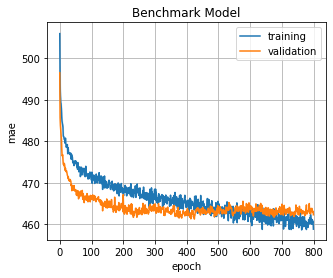

In [12]:
import seaborn as sns
loss = pd.read_csv('log.csv',  sep=';')
print(loss.head())

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data=loss, x='epoch', y='mae', label='training')
ax = sns.lineplot(data=loss, x='epoch', y='val_mae', label='validation')
ax.grid()
ax.set_title('Benchmark Model')
ax.legend()

Around epochs=230 we can stop the training since the validation loss reaches the minimum. If we train the model more than necessary there is the risk of overfitting as the model won't be able to generalize.

In [13]:
model_b.fit(X_train,y_train,epochs=230,batch_size=64,validation_data=[X_test,y_test])
print('Final MAE of validation: %f' %(model_b.evaluate(X_test, y_test)[1]))

Epoch 1/230
250/250 [==============================] - 1s 3ms/step - loss: 460.2432 - mae: 460.2432 - val_loss: 463.4721 - val_mae: 463.4721
Epoch 2/230
250/250 [==============================] - 1s 3ms/step - loss: 460.5812 - mae: 460.5812 - val_loss: 464.0488 - val_mae: 464.0488
Epoch 3/230
250/250 [==============================] - 1s 3ms/step - loss: 459.9514 - mae: 459.9514 - val_loss: 463.3882 - val_mae: 463.3882
Epoch 4/230
250/250 [==============================] - 1s 2ms/step - loss: 457.8713 - mae: 457.8713 - val_loss: 463.2037 - val_mae: 463.2037
Epoch 5/230
250/250 [==============================] - 1s 3ms/step - loss: 459.0720 - mae: 459.0720 - val_loss: 463.1073 - val_mae: 463.1073
Epoch 6/230
250/250 [==============================] - 1s 3ms/step - loss: 459.8507 - mae: 459.8507 - val_loss: 463.5528 - val_mae: 463.5528
Epoch 7/230
250/250 [==============================] - 1s 3ms/step - loss: 458.6690 - mae: 458.6690 - val_loss: 461.8622 - val_mae: 461.8622
Epoch 8/230
2

# Feature Engineering

By using the features that we have, one can create new features. By comparing the deposit and deposit_next of the users, we can find out which users decided to put more money in their account than before or which users simply didn't invest more in the next 30 days. 

Another information we can get would be if a user changed their mind to play online gambling. These people withdraw all the money they put in their first activity (tenure=0) without spending any (turnover=0) and not investing in the next 30 days (deposit_next=0). These people might not be essential for the training, however, I chose to keep them for now.

In [16]:
def get_label(deposit_next, deposit):
    if deposit_next==0:
        return 'no invest'
    elif deposit_next>deposit: 
        return 'go bigger' 
    elif deposit_next<deposit:
        return 'go easy'
    
def get_level(tenure):
    if tenure<=90:
        return 'beginner'
    elif tenure>90 and tenure<=180: 
        return 'preinter' 
    elif tenure>180 and tenure<=365:
        return 'inter'
    elif tenure>365:
        return 'advanced'

def changed_decision(deposit, turnover, withdrawal, deposit_next):
    if deposit == withdrawal and turnover==0 and deposit_next==0:
        return 'yes'
    else:
        return 'no'

def did_win(deposit, turnover):
    if deposit < turnover:
        return 'yes'
    else:
        return 'no' 
    
data['next_decision'] = data.apply(lambda x: get_label(x.deposit_next, x.deposit), axis=1)
data['changed_decision'] = data.apply(lambda x: changed_decision(x.deposit, x.turnover, x.withdrawal, x.deposit_next), axis=1)
data['won_min_once'] = data.apply(lambda x: did_win(x.deposit, x.turnover), axis=1)
data['level'] = data.apply(lambda x: get_level(x.tenure), axis=1)


I can use only 'won_min_once' and 'level' as a new input feature since the other two new columns were created by using the target.


In [17]:
data.head()

,tenure,deposit,turnover,withdrawal,deposit_next,next_decision,changed_decision,won_min_once,level
0,10,762.27,1677.18,1476.24,2815.66,go bigger,no,yes,beginner
1,1473,69.99,279.16,0.00,0.00,no invest,no,yes,advanced
2,297,34.35,81.99,0.00,0.00,no invest,no,yes,inter
3,3829,4347.15,41290.29,0.00,0.00,no invest,no,yes,advanced
4,1258,3593.85,13883.59,8825.21,0.00,no invest,no,yes,advanced


# Label Encoding:

Since the new feature is a categorical feature, I will use label encoding to include its effect on the output.

I create a copy of the dataframe 'data' since I would like to keep it for legacy.

In [18]:
data_enc = data.copy()
data_enc['won_min_once'] = LabelEncoder().fit_transform(data_enc['won_min_once']) 
data_enc['level'] = LabelEncoder().fit_transform(data_enc['level']) 
data_enc.head()

,tenure,deposit,turnover,withdrawal,deposit_next,next_decision,changed_decision,won_min_once,level
0,10,762.27,1677.18,1476.24,2815.66,go bigger,no,1,1
1,1473,69.99,279.16,0.00,0.00,no invest,no,1,0
2,297,34.35,81.99,0.00,0.00,no invest,no,1,2
3,3829,4347.15,41290.29,0.00,0.00,no invest,no,1,0
4,1258,3593.85,13883.59,8825.21,0.00,no invest,no,1,0


Now I will train a new model by including the new feature that was encoded. Note that input layer will have **6 neurons** this time.

In [19]:
target = data_enc.deposit_next
input_features = data_enc[['tenure', 'deposit', 'turnover', 'withdrawal', 'won_min_once', 'level']]

scaled = scaler.fit_transform(input_features)
X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=42)

model1 = Sequential()
model1.add(Dense(128, input_shape=(6,), activation='relu'))
model1.add(Dropout(0.5)) 
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mae', metrics='mae')

csv_logger = CSVLogger('log_enc.csv', append=True, separator=';')
history=model1.fit(X_train,y_train,epochs=800,batch_size=64,validation_data=[X_test,y_test],callbacks=[csv_logger])



Epoch 1/800
250/250 [==============================] - 1s 3ms/step - loss: 506.1546 - mae: 506.1546 - val_loss: 496.4311 - val_mae: 496.4311
Epoch 2/800
250/250 [==============================] - 1s 2ms/step - loss: 493.9015 - mae: 493.9015 - val_loss: 485.5354 - val_mae: 485.5354
Epoch 3/800
250/250 [==============================] - 1s 3ms/step - loss: 491.0835 - mae: 491.0835 - val_loss: 483.3463 - val_mae: 483.3463
Epoch 4/800
250/250 [==============================] - 1s 3ms/step - loss: 489.1265 - mae: 489.1265 - val_loss: 481.8950 - val_mae: 481.8950
Epoch 5/800
250/250 [==============================] - 1s 3ms/step - loss: 488.4158 - mae: 488.4158 - val_loss: 480.8520 - val_mae: 480.8520
Epoch 6/800
250/250 [==============================] - 1s 2ms/step - loss: 487.7822 - mae: 487.7822 - val_loss: 480.4446 - val_mae: 480.4446
Epoch 7/800
250/250 [==============================] - 1s 2ms/step - loss: 485.3670 - mae: 485.3670 - val_loss: 477.1235 - val_mae: 477.1235
Epoch 8/800
2

   epoch        loss         mae    val_loss     val_mae
0      0  506.154602  506.154602  496.431091  496.431091
1      1  493.901459  493.901459  485.535400  485.535400
2      2  491.083527  491.083527  483.346283  483.346283
3      3  489.126465  489.126465  481.894989  481.894989
4      4  488.415833  488.415833  480.851990  480.851990


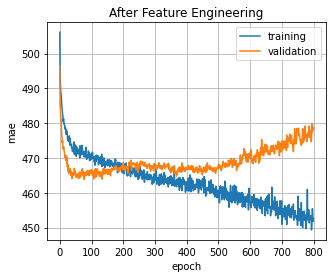

In [20]:
import seaborn as sns
loss = pd.read_csv('log_enc.csv',  sep=';')
print(loss.head())

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data=loss, x='epoch', y='mae', label='training')
ax = sns.lineplot(data=loss, x='epoch', y='val_mae', label='validation')
ax.set_title('After Feature Engineering')
ax.grid()
ax.legend()

In [21]:
model1.fit(X_train,y_train,epochs=40,batch_size=64,validation_data=[X_test,y_test])
print('Final MAE of validation: %f' %(model1.evaluate(X_test, y_test)[1]))

Epoch 1/40
250/250 [==============================] - 1s 3ms/step - loss: 452.1525 - mae: 452.1525 - val_loss: 479.0789 - val_mae: 479.0789
Epoch 2/40
250/250 [==============================] - 1s 2ms/step - loss: 452.2858 - mae: 452.2858 - val_loss: 477.5071 - val_mae: 477.5071
Epoch 3/40
250/250 [==============================] - 1s 3ms/step - loss: 454.1473 - mae: 454.1473 - val_loss: 476.5750 - val_mae: 476.5750
Epoch 4/40
250/250 [==============================] - 1s 3ms/step - loss: 452.5591 - mae: 452.5591 - val_loss: 477.2542 - val_mae: 477.2542
Epoch 5/40
250/250 [==============================] - 1s 2ms/step - loss: 451.6518 - mae: 451.6518 - val_loss: 479.1536 - val_mae: 479.1536
Epoch 6/40
250/250 [==============================] - 1s 2ms/step - loss: 449.5033 - mae: 449.5033 - val_loss: 477.7381 - val_mae: 477.7381
Epoch 7/40
250/250 [==============================] - 1s 2ms/step - loss: 449.0901 - mae: 449.0901 - val_loss: 480.2352 - val_mae: 480.2352
Epoch 8/40
250/250 [

There is no any significant different on the performance of the model.

# Does removing the outliers in the tenure column improve the performance?
---



In [22]:
print(data.shape)
data_noout = data[data.tenure<data.std().tenure*3]
print(data_noout.shape)

(20000, 9)
(18906, 9)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


1094 datapoints were removed.

In [23]:
target = data_noout.deposit_next
input_features = data_noout[['tenure', 'deposit', 'turnover', 'withdrawal']]

scaled = scaler.fit_transform(input_features)

X_train, X_test, y_train, y_test = train_test_split(scaled, target, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_shape=(4,), activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics='mae')

csv_logger = CSVLogger('log_noout.csv', append=True, separator=';')
history=model.fit(X_train,y_train,epochs=400,batch_size=64,validation_data=[X_test,y_test],callbacks=[csv_logger])

Epoch 1/400
237/237 [==============================] - 1s 3ms/step - loss: 496.5328 - mae: 496.5328 - val_loss: 473.6009 - val_mae: 473.6009
Epoch 2/400
237/237 [==============================] - 1s 3ms/step - loss: 486.0244 - mae: 486.0244 - val_loss: 462.7421 - val_mae: 462.7421
Epoch 3/400
237/237 [==============================] - 1s 3ms/step - loss: 481.2907 - mae: 481.2907 - val_loss: 460.6243 - val_mae: 460.6243
Epoch 4/400
237/237 [==============================] - 1s 2ms/step - loss: 479.6432 - mae: 479.6432 - val_loss: 459.1657 - val_mae: 459.1657
Epoch 5/400
237/237 [==============================] - 1s 3ms/step - loss: 478.9394 - mae: 478.9394 - val_loss: 458.5659 - val_mae: 458.5659
Epoch 6/400
237/237 [==============================] - 1s 3ms/step - loss: 476.9500 - mae: 476.9500 - val_loss: 457.6697 - val_mae: 457.6697
Epoch 7/400
237/237 [==============================] - 1s 3ms/step - loss: 475.4907 - mae: 475.4907 - val_loss: 457.3167 - val_mae: 457.3167
Epoch 8/400
2

   epoch        loss         mae    val_loss     val_mae
0      0  496.532837  496.532837  473.600861  473.600861
1      1  486.024384  486.024384  462.742096  462.742096
2      2  481.290710  481.290710  460.624329  460.624329
3      3  479.643158  479.643158  459.165680  459.165680
4      4  478.939423  478.939423  458.565948  458.565948


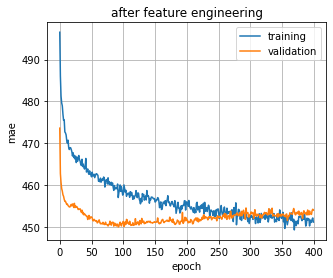

In [24]:
import seaborn as sns
loss = pd.read_csv('log_noout.csv',  sep=';')
print(loss.head())

fig, ax = plt.subplots(figsize=(5,4))
ax = sns.lineplot(data=loss, x='epoch', y='mae', label='training')
ax = sns.lineplot(data=loss, x='epoch', y='val_mae', label='validation')
ax.set_title('after feature engineering')
ax.grid()
ax.legend()

In [26]:
model.fit(X_train,y_train,epochs=75,batch_size=64,validation_data=[X_test,y_test])
print('Final MAE of validation: %f' %(model.evaluate(X_test, y_test)[1]))

Epoch 1/75
237/237 [==============================] - 2s 7ms/step - loss: 449.9264 - mae: 449.9264 - val_loss: 453.5988 - val_mae: 453.5988
Epoch 2/75
237/237 [==============================] - 1s 6ms/step - loss: 450.9687 - mae: 450.9687 - val_loss: 453.6865 - val_mae: 453.6865
Epoch 3/75
237/237 [==============================] - 1s 6ms/step - loss: 451.8118 - mae: 451.8118 - val_loss: 453.9709 - val_mae: 453.9709
Epoch 4/75
237/237 [==============================] - 1s 5ms/step - loss: 452.4342 - mae: 452.4342 - val_loss: 453.8517 - val_mae: 453.8517
Epoch 5/75
237/237 [==============================] - 1s 4ms/step - loss: 450.5044 - mae: 450.5044 - val_loss: 453.9947 - val_mae: 453.9947
Epoch 6/75
237/237 [==============================] - 1s 3ms/step - loss: 452.1294 - mae: 452.1294 - val_loss: 453.3079 - val_mae: 453.3079
Epoch 7/75
237/237 [==============================] - 1s 2ms/step - loss: 450.2321 - mae: 450.2321 - val_loss: 453.2312 - val_mae: 453.2312
Epoch 8/75
237/237 [

Model improved.

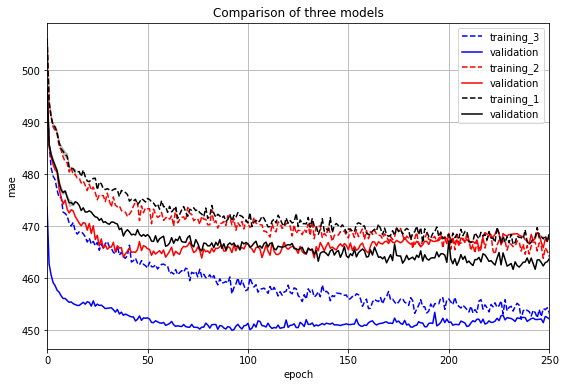

In [27]:
loss3 = pd.read_csv('log_noout.csv',  sep=';')
loss2 = pd.read_csv('log_enc.csv',  sep=';')
loss1 = pd.read_csv('log.csv',  sep=';')

fig, ax = plt.subplots(figsize=(9,6))
ax = sns.lineplot(data=loss3, x='epoch', y='mae', label='training_3', color='b',linestyle="dashed")
ax = sns.lineplot(data=loss3, x='epoch', y='val_mae', label='validation', color='b')
ax = sns.lineplot(data=loss2, x='epoch', y='mae', label='training_2',color='r', linestyle="dashed")
ax = sns.lineplot(data=loss2, x='epoch', y='val_mae', label='validation', color='r')
ax = sns.lineplot(data=loss1, x='epoch', y='mae', label='training_1', color='k', linestyle="dashed")
ax = sns.lineplot(data=loss1, x='epoch', y='val_mae', label='validation', color='k')
ax.set_title('Comparison of three models')
ax.grid()
ax.set_xlim(0,250)
ax.legend()